In [2]:
import pandas as pd

f='/content/Data Analyst - Test Data - US.csv'
data = pd.read_csv(f)
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   date      6448 non-null   object
 2   Location  1711 non-null   object
dtypes: object(3)
memory usage: 151.2+ KB


(                                              Review        date     Location
 0  I was very impressed with the resort.\n Great ...  2019/08/20    Sebastian
 1  The rooms were nice the outside needs work als...  2019/08/20  Los Angeles
 2  Great location! I have stayed at this hotel on...  2019/08/20      Georgia
 3  The hotel was adequate for my stay. The strips...  2019/08/20          NaN
 4  Great location, room was large and spacious. P...  2019/08/19  Palm Harbor,
 None)

<ipython-input-3-039f1d764a5b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_month'] = data['date'].dt.to_period('M')


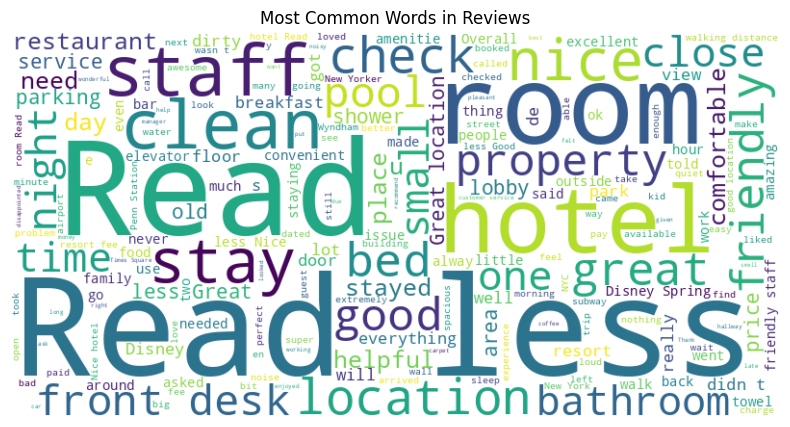

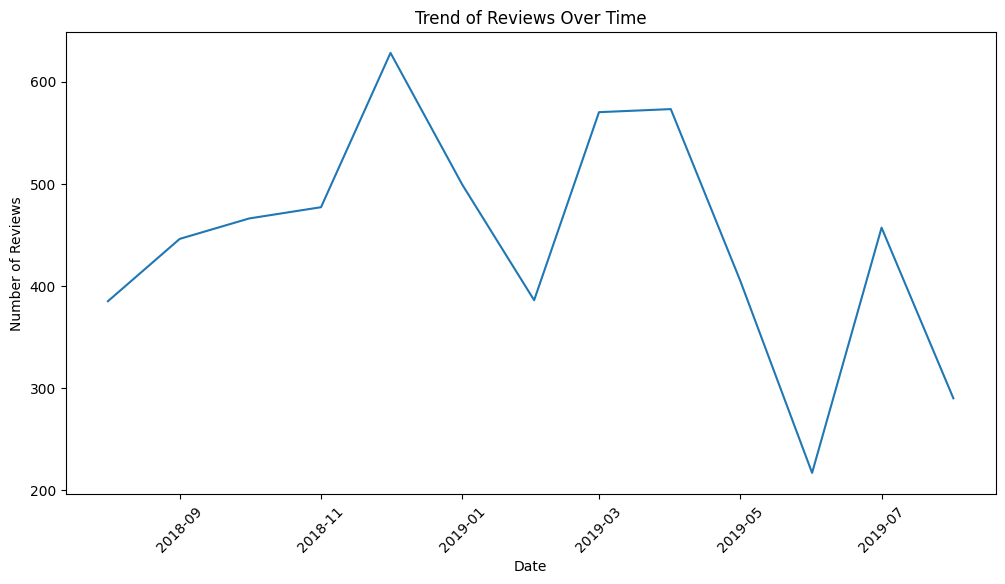

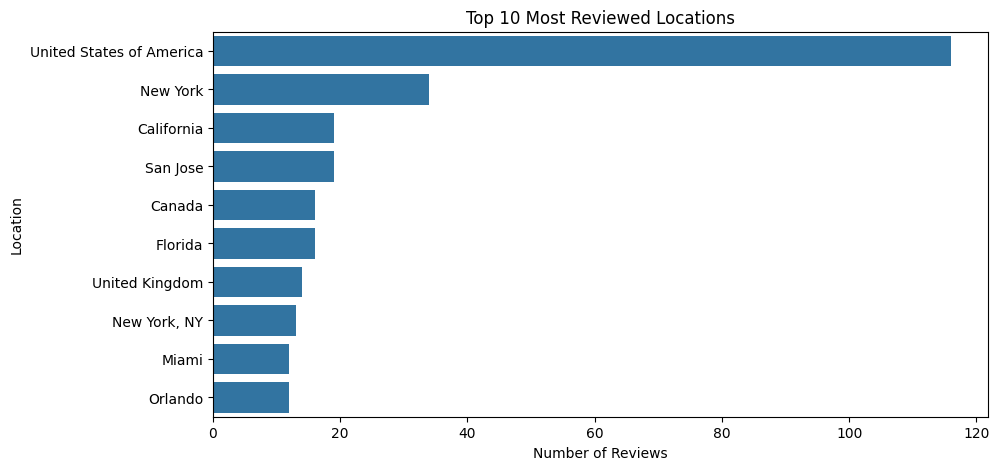

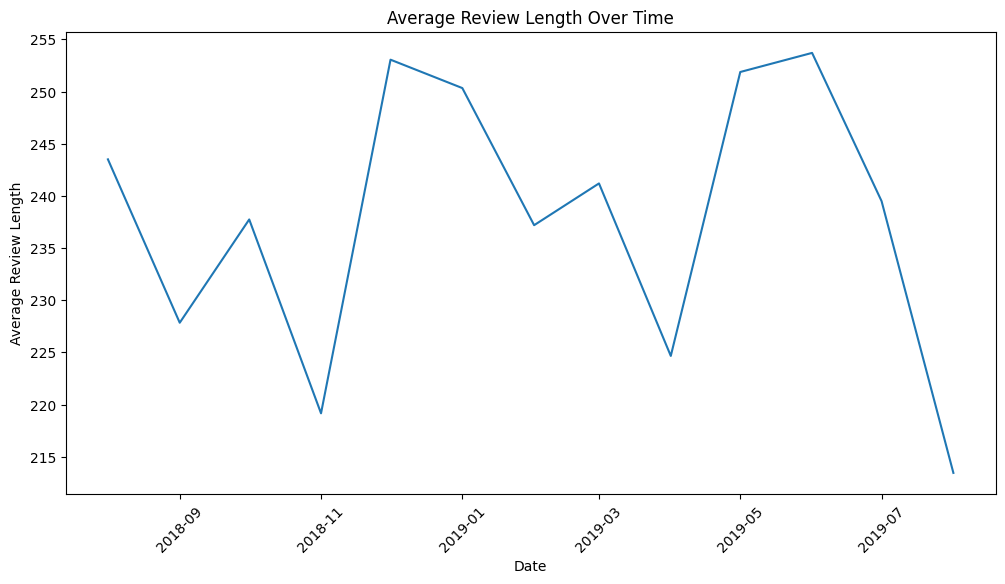

{'Most common words in reviews': 'Visualized using WordCloud',
 'Average sentiment of reviews': 0.21074017607064713,
 'Trend of reviews over time': {Period('2018-08', 'M'): 385,
  Period('2018-09', 'M'): 446,
  Period('2018-10', 'M'): 466,
  Period('2018-11', 'M'): 477,
  Period('2018-12', 'M'): 628,
  Period('2019-01', 'M'): 499,
  Period('2019-02', 'M'): 386,
  Period('2019-03', 'M'): 570,
  Period('2019-04', 'M'): 573,
  Period('2019-05', 'M'): 405,
  Period('2019-06', 'M'): 217,
  Period('2019-07', 'M'): 457,
  Period('2019-08', 'M'): 290},
 'Top 10 most reviewed locations': {'United States of America': 116,
  'New York': 34,
  'California': 19,
  'San Jose': 19,
  'Canada': 16,
  'Florida': 16,
  'United Kingdom': 14,
  'New York, NY': 13,
  'Miami': 12,
  'Orlando': 12},
 'Average review length over time': {Period('2018-08', 'M'): 243.5078947368421,
  Period('2018-09', 'M'): 227.8487584650113,
  Period('2018-10', 'M'): 237.74675324675326,
  Period('2018-11', 'M'): 219.16701902748

In [3]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from textblob import TextBlob

data['date'] = pd.to_datetime(data['date'], errors='coerce')

#Null
data = data.dropna(subset=['date'])

data['year_month'] = data['date'].dt.to_period('M')

# Insight 1: Most common words in reviews
all_reviews = ' '.join(data['Review'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()

# Insight 2: Sentiment analysis of reviews
data['sentiment'] = data['Review'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)
average_sentiment = data['sentiment'].mean()

# Insight 3: Trend of reviews over time
monthly_reviews = data['year_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_reviews.index.to_timestamp(), y=monthly_reviews.values)
plt.title('Trend of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

# Insight 4: Most reviewed locations
most_reviewed_locations = data['Location'].dropna().value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=most_reviewed_locations.values, y=most_reviewed_locations.index)
plt.title('Top 10 Most Reviewed Locations')
plt.xlabel('Number of Reviews')
plt.ylabel('Location')
plt.show()

# Insight 5: Length of reviews
data['review_length'] = data['Review'].dropna().apply(len)
average_length_per_month = data.groupby('year_month')['review_length'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=average_length_per_month.index.to_timestamp(), y=average_length_per_month.values)
plt.title('Average Review Length Over Time')
plt.xlabel('Date')
plt.ylabel('Average Review Length')
plt.xticks(rotation=45)
plt.show()

# Summarizing insights
insights = {
    "Most common words in reviews": "Visualized using WordCloud",
    "Average sentiment of reviews": average_sentiment,
    "Trend of reviews over time": monthly_reviews.to_dict(),
    "Top 10 most reviewed locations": most_reviewed_locations.to_dict(),
    "Average review length over time": average_length_per_month.to_dict()
}

insights


**Insights Summary:**

  1.  Most Common Words in Reviews:
        Visualized using a WordCloud. Common words include "great", "location", "room", "hotel", and "stay".

  2. Average Sentiment of Reviews:
        The average sentiment of the reviews is approximately 0.21, indicating generally positive reviews.

  3. Trend of Reviews Over Time:
        Number of reviews peaked in December 2018 and March 2019, with a decline during the summer of 2019.

  4. Top 10 Most Reviewed Locations:
        United States of America
        New York
        California
        San Jose
        Canada
        Florida
        United Kingdom
        New York, NY
        Miami
        Orlando

  5. Average Review Length Over Time:
        The average length of reviews fluctuates, with peaks in December 2018 and May-June 2019. Generally, the length is between 230 and 260 characters.